In [1]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
import access_era_5 as access_era_5
from statsmodels.tsa.stattools import adfuller


/home/pbose/tcc/pesquisa/era5/access_era_5.py:9: UserWarning: The specified chunks separate the stored chunks along dimension "valid_time" starting at index 100. This could degrade performance. Instead, consider rechunking after loading.
  ds = xr.open_dataset(caminho_completo, chunks={"valid_time": 100})


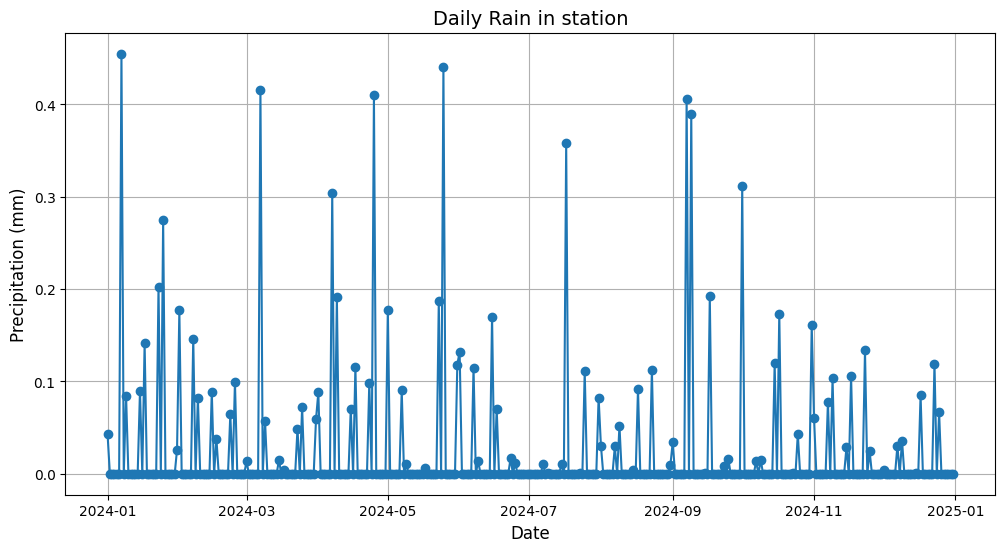

In [2]:
timeseries = access_era_5.recuperar_dados_era_5()
dias = timeseries['valid_time']
total_chuva = timeseries['tp']
train_size = int(len(total_chuva) * 0.60)
test_size = len(total_chuva) - train_size
train, test = total_chuva[:train_size], total_chuva[train_size:]
dias = pd.to_datetime(dias)

# Faz o plot
plt.figure(figsize=(12,6))
plt.plot(dias, total_chuva, marker="o", linestyle="-")

plt.title("Daily Rain in station", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Precipitation (mm)", fontsize=12)
plt.grid(True)
plt.show()


In [3]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(timeseries['tp'])

1. ADF :  -8.351071983190925
2. P-Value :  2.993685589237761e-13
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression: 360
5. Critical Values :
	 1% :  -3.448645946352023
	 5% :  -2.869602139060357
	 10% :  -2.5710650077160495


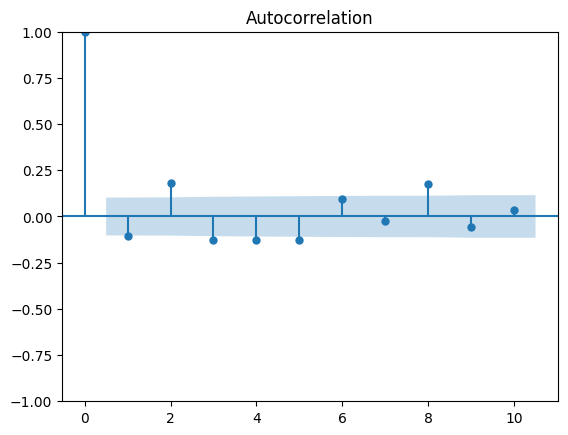

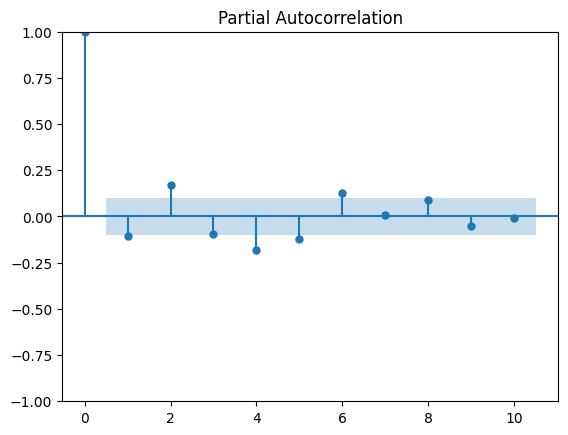

In [4]:
plot_acf(timeseries['tp'], lags=10)
plot_pacf(timeseries['tp'], lags=10)
plt.show()

In [5]:
#ARIMA AUTO
model = ARIMA(train, order=(2, 1, 1))
model = model.fit()
test_forecast = model.forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.values, index=test.index)


rmse = sqrt(mean_squared_error(test_forecast, test))
print('RMSE:', rmse)


RMSE: 0.06241279415316


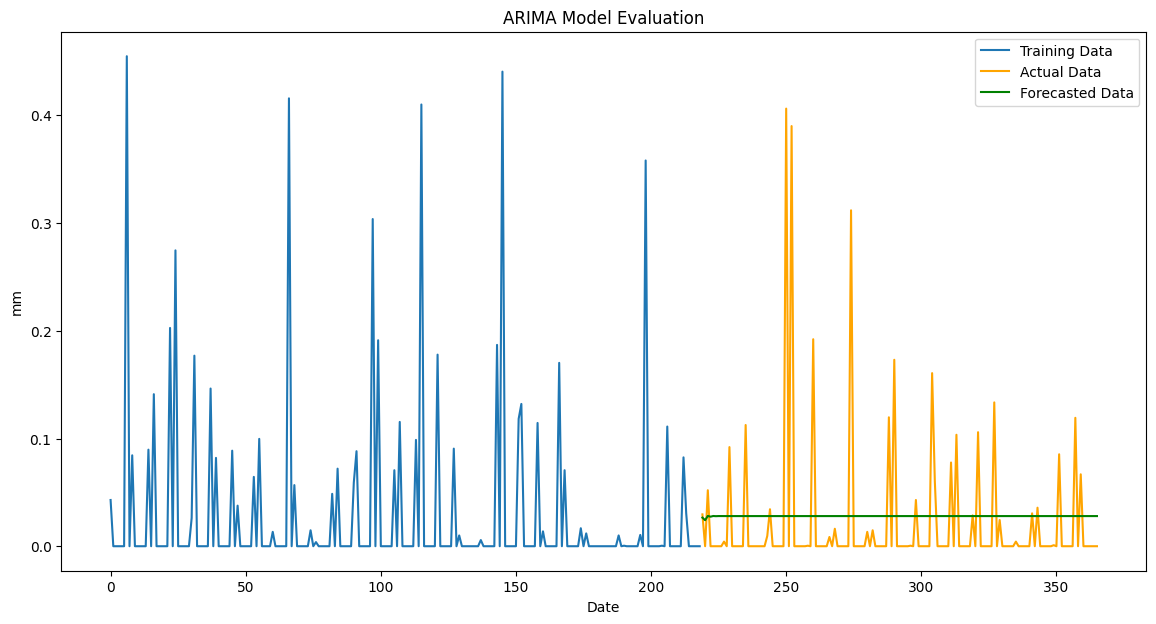

In [6]:

# Plot
plt.figure(figsize=(14,7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')

plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('mm')
plt.legend()
plt.show()
